<a href="https://colab.research.google.com/github/Tanishqchahal/Object_detection_Faster_R-CNN/blob/main/ObjectDetection_Faster_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import torchvision
from torchvision import  transforms
import torch
from torch import no_grad

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Loading pre-trained Model

In [ ]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights = 'DEFAULT')
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False
print('Model Loaded')

Model Loaded


## Function to use model

In [ ]:
def model(x):
    with torch.no_grad():
        pred = model_(x)
    return pred

## COCO Categories

In [ ]:
COCO_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [ ]:
len(COCO_CATEGORY_NAMES)

91

Loaded 91 Categories

## Auxiliary Functions

In [ ]:
def get_predictions(pred, threshold = 0.8, objects = None):

    predicted_classes = [(COCO_CATEGORY_NAMES[i], prob, [(box[0], box[1]),(box[2], box[3])]) for i, prob, box in zip(list(pred[0]['labels'].numpy()), pred[0]['scores'].detach().numpy(), list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes = [stuff for stuff in predicted_classes if stuff[1] > threshold]

    if objects and predicted_classes:
        predicted_classes = [(name, prob, box) for name , prob, box in predicted_classes if name in objects]
    return predicted_classes

In [ ]:
def make_box(predicted_classes, image, rect_th = 10, text_size = 3, text_th = 3):

  img = (np.clip(cv2.cvtColor(np.clip(image.numpy().transpose(1, 2, 0), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

  for predicted_class in predicted_classes:
      label = predicted_class[0]
      prob = predicted_class[1]
      box = predicted_class[2]

      start_pt = (int(box[0][0]), int(box[0][1]))
      end_pt = (int(box[1][0]), int(box[1][1]))

      cv2.rectangle(img, start_pt, end_pt, (0, 255, 0), rect_th)
      cv2.putText(img, label, start_pt, cv2.FONT_HERSHEY_COMPLEX_SMALL, text_size, (0, 255, 0), thickness = text_th)
      cv2.putText(img, label+' '+str(round(prob, 2)), start_pt, cv2.FONT_HERSHEY_COMPLEX_SMALL, text_size, (0, 255, 0), thickness = text_th)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Object Localization

Importing image

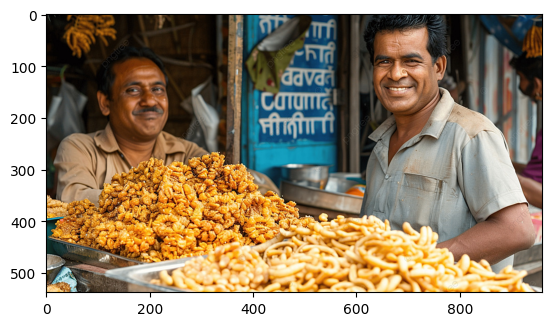

In [ ]:
img_path = 'testing.jpg'
image = Image.open(img_path)

image.resize([int(0.5 * s) for s in image.size])

plt.imshow(image)
plt.show()

Transforming Image

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
img = transform(image)

Prediction

In [ ]:
pred = model([img])

In [ ]:
pred[0]['labels']

tensor([ 1,  1, 51,  1, 51, 31,  1, 62, 58, 52, 51,  1, 67, 58, 81, 81,  1, 67,
        62, 50, 51, 84, 61, 31, 59, 27, 58, 28, 51, 51,  1, 67, 55, 52, 58, 31,
        60, 53,  1, 62, 47, 62, 60, 61, 52, 61, 58, 52, 61, 52,  1, 84, 51, 59])

In [ ]:
pred[0]['scores']

tensor([0.9994, 0.9984, 0.9328, 0.8442, 0.5364, 0.5257, 0.5049, 0.4822, 0.4791,
        0.4753, 0.4164, 0.3080, 0.2886, 0.2815, 0.2476, 0.2403, 0.2369, 0.2328,
        0.2206, 0.2077, 0.2013, 0.1738, 0.1640, 0.1195, 0.1191, 0.1165, 0.1076,
        0.1055, 0.1017, 0.0979, 0.0899, 0.0872, 0.0862, 0.0855, 0.0855, 0.0815,
        0.0811, 0.0806, 0.0739, 0.0700, 0.0686, 0.0683, 0.0664, 0.0652, 0.0651,
        0.0647, 0.0596, 0.0584, 0.0572, 0.0558, 0.0536, 0.0526, 0.0524, 0.0511])

In [ ]:
pred_class = get_predictions(pred)
pred_class

[('person', 0.9994362, [(599.07574, 3.1538603), (943.076, 495.60757)]),
 ('person', 0.99836737, [(15.932005, 65.35434), (322.55457, 379.18982)]),
 ('bowl', 0.93277687, [(0.18934864, 463.13116), (38.905514, 525.3141)]),
 ('person', 0.84419334, [(901.38995, 225.73328), (959.85236, 376.0808)])]

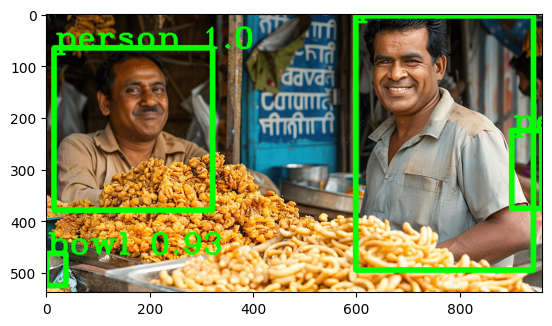

In [ ]:
make_box(pred_class, img)

## URL Image

In [ ]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzg7jYSVYYdHg8lG1-A0bkTfGrbkHklGY9gg&s"

In [ ]:
import requests
image = Image.open(requests.get(url, stream = True).raw).convert('RGB')

In [ ]:
url_img = transform(image)
pred = model([url_img])
pred_classes = get_predictions(pred)

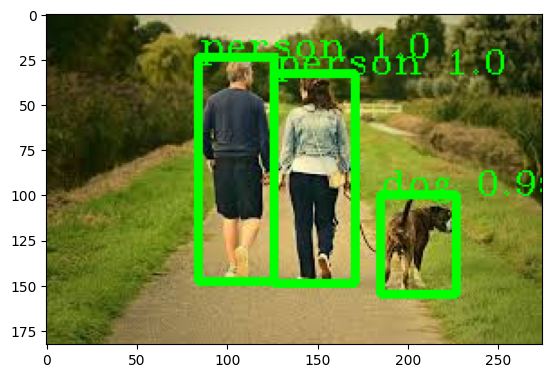

In [ ]:
make_box(pred_classes, url_img, 3, 1, 1)